In [1]:
library(naturalsort)
library(data.table)
library(data.tree)
library(Biostrings)
library(fields)
dataDir <- '../../Data/Simulations/SimOut032718/'

Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, as.vector, cbind, colnames,
    do.call, duplicated, eval, evalq, Filter, Find, get, grep, grepl,
    intersect, is.unsorted, lapply, lengths, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unlist, unsplit

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: IRanges

Attaching package: ‘IRanges’

The follo

In [2]:
flst<-list.files(dataDir) # Get list of files from directory
flst <- naturalsort(flst) # Natural sort the files

flst

[1] "out0.rda"  "out1.rda"  "out2.rda"  "out3.rda"  "out4.rda"  "out5.rda" 
 [7] "out6.rda"  "out7.rda"  "out8.rda"  "out9.rda"  "out10.rda" "out11.rda"
[13] "out12.rda" "out13.rda" "out14.rda" "out15.rda" "out16.rda" "out17.rda"
[19] "out18.rda" "out19.rda" "out20.rda" "pid.txt"

In [7]:
flst<-list.files(dataDir) # Get list of files from directory
flst <- naturalsort(flst) # Natural sort the files
nclst <- c() # Total number of cells for each simulation
ncls <- c() # Number of cells for each genotype
rs <- c() # Division rate for each genotype
cellPs <- c() # transposition probabilities for each genotype
nGeno <- c() # Number of genotypes for each simulation

k<-1
for (i in 1:15) { # Loop over files
    print(i)
    load(paste0(dataDir,flst[i])) # Load the current simulation output file
    nGeno[k] <- CellPop$totalCount # Get number of genotypes in population (number of L1 insertions)
    if (CellPop$totalCount==1) { # If the genotype tree has 1 node
        nclst[[k]] <- CellPop$ncells[length(CellPop$ncells)] # Get number of cells of node
        ncls[[k]] <- CellPop$ncells[length(CellPop$ncells)]
    }
    else {
        nclst[[k]] <- sum(vapply(CellPop$Get('ncells'),tail,n=1L,FUN.VALUE = numeric(1))) # Get number of cells for all nodes
        ncls[[k]] <- vapply(CellPop$Get('ncells'),tail,n=1L,FUN.VALUE = numeric(1))
    }
    rs[[k]] <- CellPop$Get('r') # Get the division rates of all nodes
    cellPs[[k]] <- CellPop$Get('cellP') # Get the transposition probabilities for all nodes
    rm('CellPop')
    k <- k+1 
    
}

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15


In [8]:
# Function for computing mode value
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}

In [9]:
rs_var <- c()
rs_mean <- c()
rs_max <- c()
cellPs_var <- c()
cellPs_mean <- c()
ncls_var <- c()

for (i in 1:length(rs)) {
    
    if (length(rs[[i]])==1) {rs_var[i] <- 0}
    if (length(cellPs[[i]])==1) {cellPs_var[i] <- 0}
    
    else {
        rs_var[i] <- var(rs[[i]])
        rs_mean[i] <- mean(rs[[i]])
        rs_max[i] <- max(rs[[i]])
        cellPs_var[i] <- var(cellPs[[i]])
        cellPs_mean[i] <- mean(cellPs[[i]])
    }
    ncls_var[i] <- var(ncls[[i]])

}

In [10]:
norml <- function(x) {
    x = (x-min(x))/(max(x)-min(x))
    return(x)}

In [11]:
matrix(nclst[1:15],nrow=3,ncol=5,byrow=TRUE)

60769,64863,63210,64377,62903
64865,59737,63544,47628,64067
61810,85661,63925,65581,59366


In [12]:
matrix(rs_mean[1:15],nrow=3,ncol=5,byrow=TRUE)

0.9788863,0.9852563,0.9856178,0.9823682,0.9799567
0.9912711,0.9818906,0.9873646,0.9827730,0.9808773
1.0520366,1.3083186,0.9940963,1.0214876,1.0128829


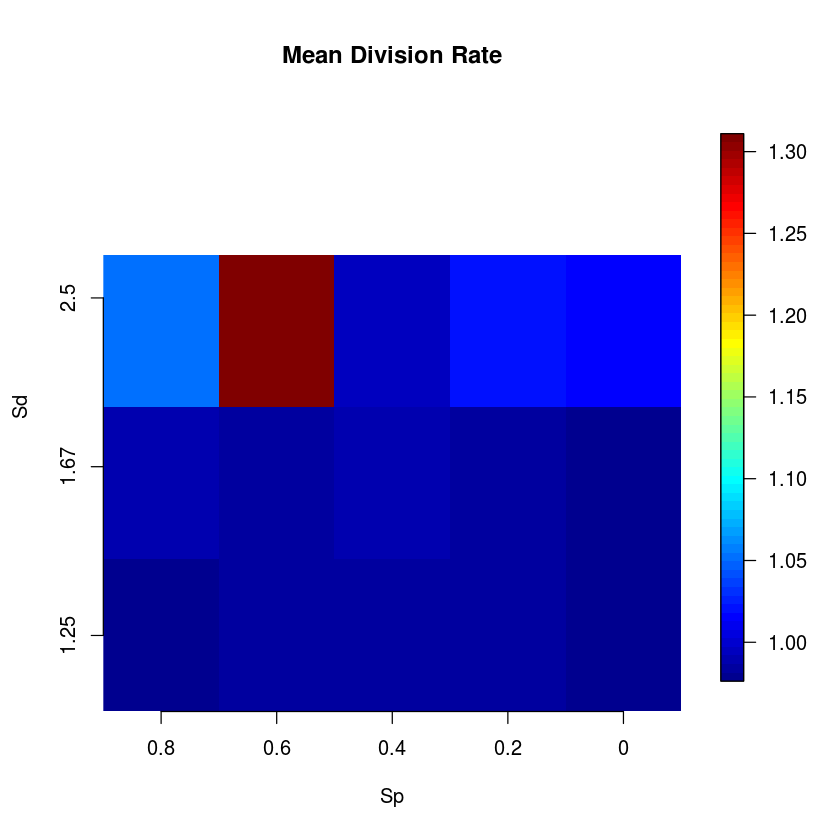

In [13]:
rotate <- function(x) t(apply(x, 2, rev))

image.plot(rotate(apply(matrix(rs_mean[1:20],nrow=4,ncol=5,byrow=TRUE),2,rev)),axes=F)

title(main="Mean Division Rate",xlab='Sp',ylab='Sd');
axis(1, at=seq(0,1,0.25), labels=seq(0.8,0.0,-0.2)); 
axis(2, at=seq(0,1,.37), labels=c(1.25,1.67,2.50)); 

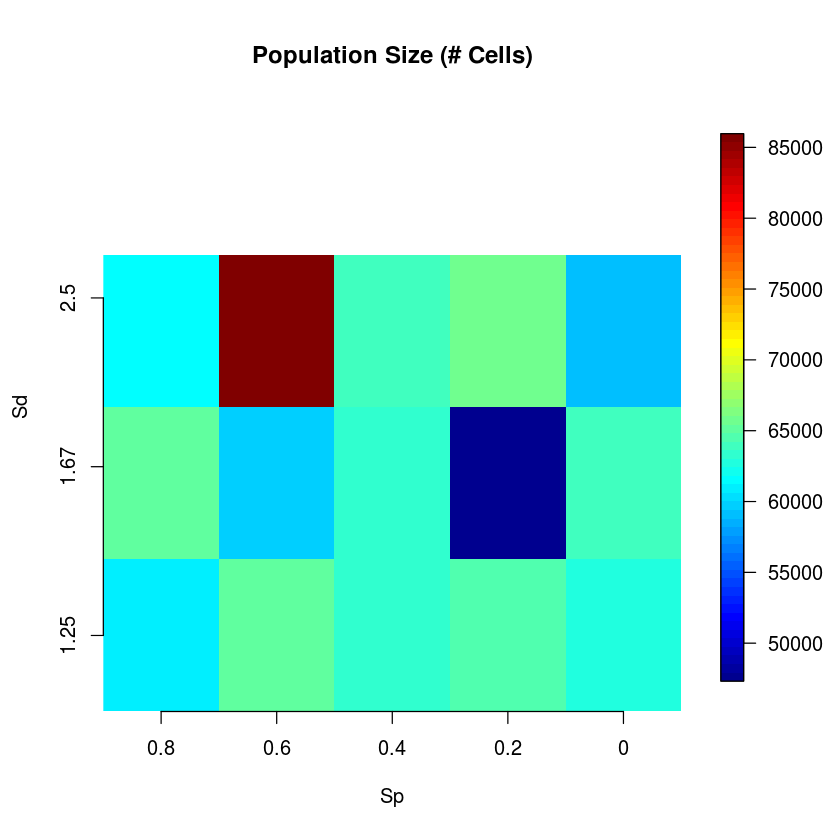

In [14]:
rotate <- function(x) t(apply(x, 2, rev))

image.plot(rotate(apply(matrix(nclst[1:20],nrow=4,ncol=5,byrow=TRUE),2,rev)),axes=F)

title(main="Population Size (# Cells)",xlab='Sp',ylab='Sd');
axis(1, at=seq(0,1,0.25), labels=seq(0.8,0.0,-0.2)); 
axis(2, at=seq(0,1,.37), labels=c(1.25,1.67,2.50)); 

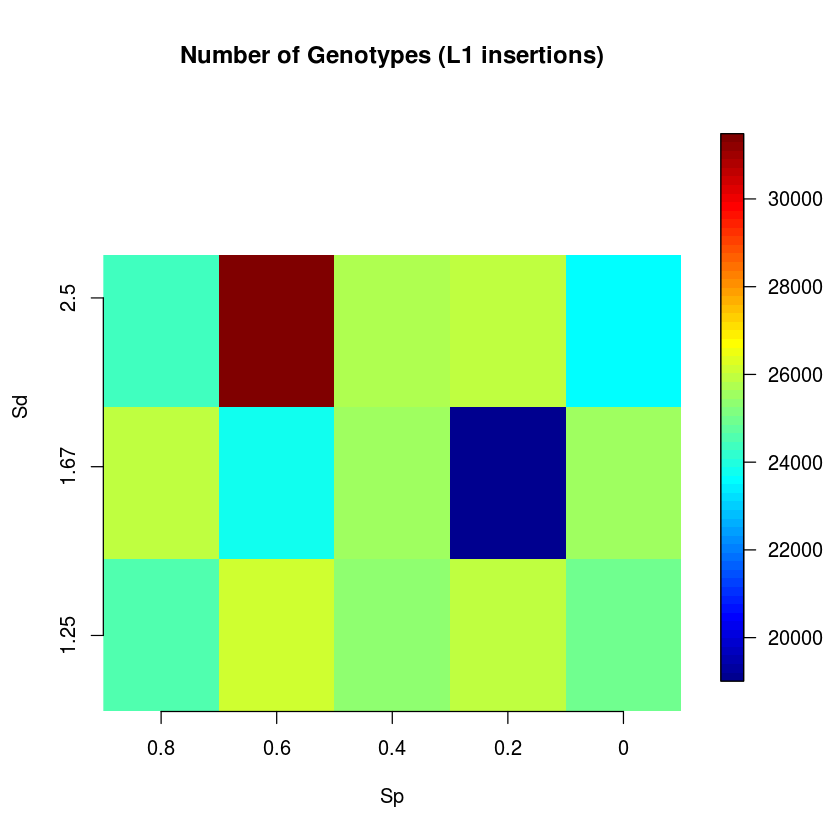

In [15]:
rotate <- function(x) t(apply(x, 2, rev))

image.plot(rotate(apply(matrix(nGeno[1:20],nrow=4,ncol=5,byrow=TRUE),2,rev)),axes=F)

title(main="Number of Genotypes (L1 insertions)",xlab='Sp',ylab='Sd');
axis(1, at=seq(0,1,0.25), labels=seq(0.8,0.0,-0.2)); 
axis(2, at=seq(0,1,.37), labels=c(1.25,1.67,2.50)); 